In [571]:
#Name:Nandish Bakulkumar Bhatt
#Student ID:200441204

#First of all importing all modules depending on requirements. 

import pandas as pd    #for data processing and extracting data from file
import matplotlib.pyplot as plt    #Plotting the functions
import numpy as np   #for array operations
from math import sqrt #only importing square root function from math library
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
import operator

In [572]:
#Reading the data from csv file 

df=pd.read_csv("D:/MENG/Sem3/ENEL 865-ML/Assignment/Programming Assignment/archive/Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [573]:
#Q1

#Now, 'Constant' column is added in the Dataframe for matrix multiplication, as a coefficient of 'Intercept'.
df['Constant']=1
df

,Species,Weight,Length1,Length2,Length3,Height,Width,Constant
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,1
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,1
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,1
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,1


In [574]:
#Now, from the above data we can conclude that 
#Length1,Length2,Length3,Height,Width,Constant are independent variables and
#Weight is a dependent variable. So grouping them according to characteristics. 

x=df[['Length1','Length2','Length3', 'Height', 'Width','Constant']]
y=df[['Weight']]

In [575]:
x

,Length1,Length2,Length3,Height,Width,Constant
0,23.2,25.4,30.0,11.5200,4.0200,1
1,24.0,26.3,31.2,12.4800,4.3056,1
2,23.9,26.5,31.1,12.3778,4.6961,1
3,26.3,29.0,33.5,12.7300,4.4555,1
4,26.5,29.0,34.0,12.4440,5.1340,1
...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,1
155,11.7,12.4,13.5,2.4300,1.2690,1
156,12.1,13.0,13.8,2.2770,1.2558,1
157,13.2,14.3,15.2,2.8728,2.0672,1


In [576]:
y

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


In [577]:
#Now, know about that is there any missing data?
#Also to know about the data type of column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length1   159 non-null    float64
 3   Length2   159 non-null    float64
 4   Length3   159 non-null    float64
 5   Height    159 non-null    float64
 6   Width     159 non-null    float64
 7   Constant  159 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [578]:
#Analysing about the data regarding maximum, minimum, mean, deviation of each.


df.describe()

,Weight,Length1,Length2,Length3,Height,Width,Constant
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.0
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486,1.0
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804,0.0
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600,1.0
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650,1.0
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500,1.0
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500,1.0
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000,1.0


In [579]:
#Importing only Train-Test-Split function from Scikit module.
#Thus, we will obtain training values of x,y and Test Values of x,y.
#I have divided the data randomly into 80% training and rest 20% in testing. 

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [580]:
#Plotting to see which values of x in training will come.
#It is observed that out of 159 rows, only 127 rows are coming under x_train as it covers 80% of x. 

x_train

,Length1,Length2,Length3,Height,Width,Constant
11,28.7,31.0,36.2,14.3714,4.8146,1
137,42.0,45.0,48.0,6.9600,4.8960,1
96,22.0,24.0,25.5,7.2930,3.7230,1
15,29.4,32.0,37.2,15.4380,5.5800,1
123,39.0,42.0,44.6,12.8002,6.8684,1
...,...,...,...,...,...,...
140,48.3,51.7,55.1,8.9262,6.1712,1
79,17.2,19.0,20.2,5.6358,3.0502,1
138,43.2,46.0,48.7,7.7920,4.8700,1
136,40.1,43.0,45.8,7.7860,5.1296,1


In [581]:
#Similarly, for y_train. 

y_train

,Weight
11,500.0
137,500.0
96,225.0
15,600.0
123,1100.0
...,...
140,950.0
79,80.0
138,567.0
136,540.0


In [582]:
#This is a User Defined function to find regression using Gradient Descent Method.
#Some variables are used with their short names,which are described as below:-
#fm_train & fm_test=Training and Testing data of Feature Matrix
#op_train & op_test=Training and Testing data of Output
#eta=Step Size

def regression_gradient_descent(iterations,fm_train,op_train,fm_test,op_test,initial_weights,eta,tolerance):
    
    #Initiating dictionaries  for plotting the graphs
    plt_train={}
    plt_test={}
    
    condition=True
    k=0
    
    while condition:

        #predicted values of training and testing dataset
        pd_train=predict_output(fm_train,initial_weights)
        pd_test=predict_output(fm_test,initial_weights)
        
        #error values of training and testing dataset
        err_train=err(op_train,pd_train)
        err_test=err(op_test,pd_test)
        
        #saving value into dictionary and then plotting afterwards
        plt_train[k]= (np.sum((err_train)**2))
        plt_test[k]=(np.sum((err_test)**2))
        
        gradient_sum_squares = 0
        
        #Nested For Loop for iteration of each element in Weight vector        
        for i in range(len(initial_weights)):
        
            #to know about from where these steps below came from, is attached in the notes
            derivative=features_derivative(err_train,fm_train[:,i])
            initial_weights[i] = initial_weights[i]-(eta*derivative)
            gradient_sum_squares = (derivative * derivative) + gradient_sum_squares
            
#        prediction_dur=predict_output(feature_matrix,w0)
#        rss=((output-prediction_dur)**2)
        #print("RSS=",rss)
        gradient_magnitude = sqrt(gradient_sum_squares)
        
        #This condition is used if counter k exceeds iteration value 
        if k>iterations:
            condition=False
        
        #This condition is used to check if tolerance is greater than gradient magnitude
        if gradient_magnitude<tolerance:
            condition=False
        
        k=k+1 
    
    #Plotting for training data
    plt.scatter(plt_train.keys(),plt_train.values(),color='red',label="Data Points")
    plt.xlabel("x_train")
    plt.ylabel("y_train")
    plt.title("Training Data")
    plt.legend()
    plt.grid()
    plt.show()

    #Plotting for test data
    plt.scatter(plt_test.keys(),plt_test.values(),color='red',label="Data Points")
    plt.xlabel("x_test")
    plt.ylabel("y_test")
    plt.title("Testing Data")
    plt.legend()
    plt.grid()
    plt.show()     

In [583]:
#This function takes the Feature Matrix and Weights from Input, and returns the Predicted value by dot multiplying.
def predict_output(feature_matrix,weights):
    predictions=np.dot(feature_matrix,weights)
    predictions=np.array(predictions)
    return(predictions)

In [584]:
##This function takes the parameters:- Error Matrix and Feature from Input, and returns by taking Derivative value.
def features_derivative(errors,feature):
    derivative=2*(np.dot(errors,feature))
    derivative=np.array(derivative)
    return(derivative)

In [585]:
#This function calculates the error between predicted value and actual value.
def err(output_act,prediction):
    error=prediction-output_act
    return(error)

In [586]:
#This function calculates the RSS. 
def rss(feature_matrix,output,weights):
    y_act=output
    y_pred=predict_output(feature_matrix,weights)
    rss=((y_act-y_pred)**2).sum()
    return(rss)

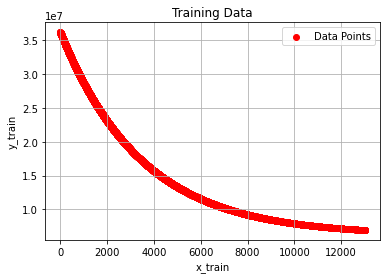

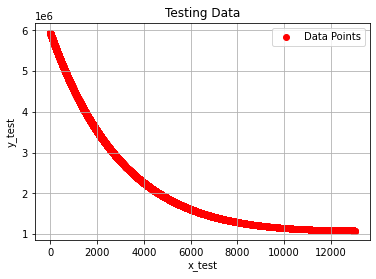

Model Coefficients for Length1= [-7.1644073  15.43776063]


In [587]:
#Q2

#Q2(a)

iter1=13000

x1_train=x_train.iloc[:, [5,0]] 
x1_test=x_test.iloc[:, [5,0]]

fm_train=np.array(x1_train)
fm_test=np.array(x1_test)

initial_weights=np.array([-7.5,1])

op_train=np.array(y_train['Weight'])
op_test=np.array(y_test['Weight'])

regression_gradient_descent(iter1,fm_train,op_train,fm_test,op_test,initial_weights,7e-10,1400)
print("Model Coefficients for Length1=",initial_weights)

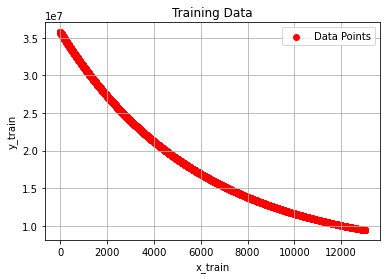

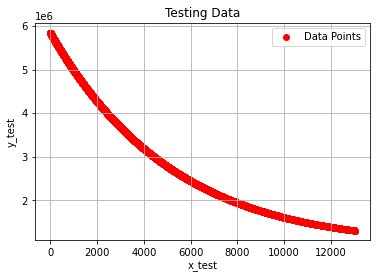

Model Coefficients for Length1,Width= [-8.21840374 11.99342964  2.82198941]


In [588]:
#Q2(b)

iter2=13000

x2_train=x_train.iloc[:, [5,0,4]] 
x2_test=x_test.iloc[:, [5,0,4]]

fm_train=np.array(x2_train)
fm_test=np.array(x2_test)

initial_weights=np.array([-8.5,1,1])

op_train=np.array(y_train['Weight'])
op_test=np.array(y_test['Weight'])

regression_gradient_descent(iter2,fm_train,op_train,fm_test,op_test,initial_weights,4e-10,1400)
print("Model Coefficients for Length1,Width=",initial_weights)

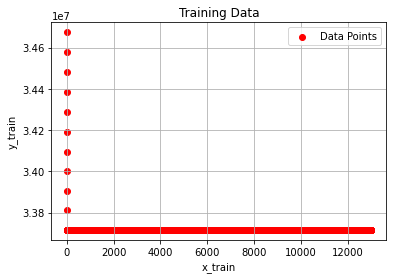

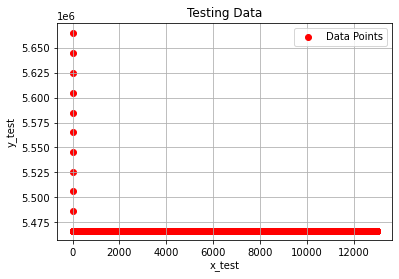

Model Coefficients for Length1,Width,Height= [0 1 1 1]


In [589]:
#Q2(c)

iter3=13000

x3_train=x_train.iloc[:, [5,0,4,3]] 
x3_test=x_test.iloc[:, [5,0,4,3]]

fm_train=np.array(x3_train)
fm_test=np.array(x3_test)

initial_weights=np.array([-10,1,1,1])

op_train=np.array(y_train['Weight'])
op_test=np.array(y_test['Weight'])

regression_gradient_descent(iter3,fm_train,op_train,fm_test,op_test,initial_weights,4e-10,1400)
print("Model Coefficients for Length1,Width,Height=",initial_weights)

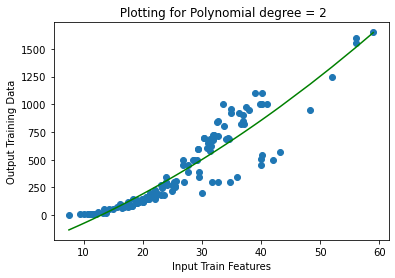

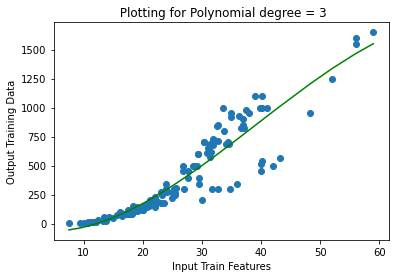

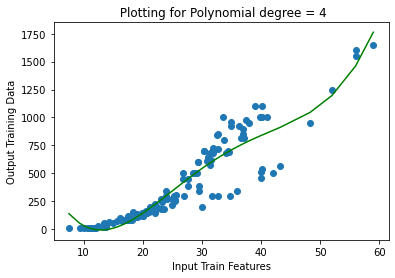

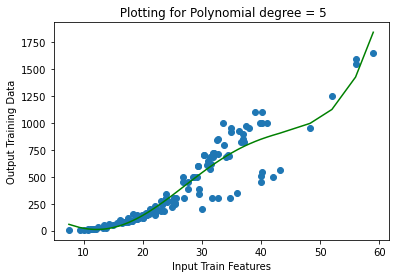

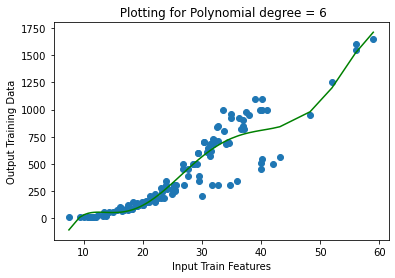

RSS for models with Degree 2,3,4,5,6 on Train Dataset is: {2: 2653023.3620856414, 3: 2590908.5876349327, 4: 2312056.228998016, 5: 2275522.4441330903, 6: 2127837.8345661573}
RSS for models with Degree 2,3,4,5,6 on Test Dataset is: {2: 444431.5214395503, 3: 403631.7850753034, 4: 351269.62030363, 5: 325323.50736134476, 6: 329274.7468647846}


In [590]:
#Q3
#Initializing dictionaries
rss_train={}
rss_test={}

#ip=input
#ft=feature
#op=output
#pred=predicted



def rss_polynomial(op_train_pred,op_test_pred,op_train,op_test,poly_degree):
    rss_train[poly_degree] =np.sum((op_train-op_train_pred)**2)
    rss_test[poly_degree] =np.sum((op_test-op_test_pred)**2)



def plot_polynomial(ip_trainft,op_train,op_train_pred,poly_degree):
    plt.scatter(ip_trainft, op_train)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(ip_trainft,op_train_pred), key=sort_axis)
    ip_trainft, op_train_pred= zip(*sorted_zip)
    plt.plot(ip_trainft,op_train_pred,color='g')
    plt.xlabel("Input Train Features")
    plt.ylabel("Output Training Data")
    plt.title(" Plotting for Polynomial degree = " + str(poly_degree))
    plt.show()

def polynomial_conversion(ip_ft,poly_degree):
    polyfet= PolynomialFeatures(degree=poly_degree)
    ip_ft_poly = polyfet.fit_transform(ip_ft.reshape(-1,1))
    return ip_ft_poly

 
def predicted_output(ip_trainft,ip_testft,model,poly_degree,op_train,op_test):
    ip_trainft_poly=polynomial_conversion(ip_trainft,poly_degree)
    ip_testft_poly=polynomial_conversion(ip_testft,poly_degree)
    op_train_pred = model.predict(ip_trainft_poly)
    op_test_pred = model.predict(ip_testft_poly)
    rss_polynomial(op_train_pred,op_test_pred,op_train,op_test,poly_degree)
    plot_polynomial(ip_trainft,op_train,op_train_pred,poly_degree)


# this function performs polynomial regression and fits model using scikit learn library
def polynomial_regression(ip_trainft,ip_testft,op_train,op_test,poly_degree):
    ip_ft_poly= polynomial_conversion(ip_trainft,poly_degree)
    model = LinearRegression()
    model.fit(ip_ft_poly, op_train)
    predicted_output(ip_trainft,ip_testft,model,poly_degree,op_train,op_test)

poly_degree=[2,3,4,5,6]

for i in poly_degree:
    polynomial_regression(np.array(x_train['Length1']),np.array(x_test['Length1']),np.array(y_train['Weight']),np.array(y_test['Weight']),i)

print("RSS for models with Degree 2,3,4,5,6 on Train Dataset is:",rss_train)
print("RSS for models with Degree 2,3,4,5,6 on Test Dataset is:",rss_test)

In [591]:
#Q4

#Now,answering to the fourth question is degree-6 polynomial as calculated in Q3. The reason behind this is that, from the above graphs we can say
#that points follow more the actual line in case of degree-6. That is in the degree of 6, the sum of the errors between the actual data 
#and predicted datais very low. Thus,the RSS is very less in case of degree-6 as compared with other degree polynomials. 